## Processing OConnell 2024 dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load count data and gff file

In [ ]:
df = pd.read_csv('../data/bulk_data/OConnell_2024/countData/countData.tsv', sep='\t', comment = '#', index_col = 'Geneid')
df

,Chr,Start,End,Strand,Length,SRR23992090_sorted.bam,SRR23992103_sorted.bam,SRR23992114_sorted.bam,SRR23992093_sorted.bam,SRR23992144_sorted.bam,...,SRR23992168_sorted.bam,SRR23992085_sorted.bam,SRR23992086_sorted.bam,SRR23992203_sorted.bam,SRR23992204_sorted.bam,SRR23992194_sorted.bam,SRR23992178_sorted.bam,SRR23992119_sorted.bam,SRR23992196_sorted.bam,SRR23992206_sorted.bam
Geneid,,,,,,,,,,,,,,,,,,,,,
DDX11L1,NC_000001.11;NC_000001.11;NC_000001.11,11874;12613;13221,12227;12721;14409,+;+;+,1652,8,62,24,12,80,...,58,68,30,41,40,26,17,50,39,65
WASH7P,NC_000001.11;NC_000001.11;NC_000001.11;NC_0000...,14362;14970;15796;16607;16858;17233;17606;1791...,14829;15038;15947;16765;17055;17368;17742;1806...,-;-;-;-;-;-;-;-;-;-;-,1769,171,884,1603,1156,818,...,1300,1042,1686,2102,1701,1719,1203,1396,1366,1930
MIR6859-1,NC_000001.11;NC_000001.11;NC_000001.11,17369;17369;17409,17436;17391;17431,-;-;-,68,12,63,87,77,56,...,59,89,101,197,123,100,78,75,144,145
MIR1302-2HG,NC_000001.11;NC_000001.11;NC_000001.11,29774;30976;34168,30667;31093;35418,+;+;+,2263,0,1,3,0,0,...,1,0,0,1,1,0,0,0,0,1
MIR1302-2,NC_000001.11;NC_000001.11,30366;30438,30503;30458,+;+,138,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ND6,NC_012920.1,14149,14673,-,525,1328,4094,7784,6058,6439,...,7115,6691,5663,13950,15459,4860,7300,11507,8614,16504
TRNE,NC_012920.1,14674,14742,-,69,142,433,869,772,636,...,749,804,618,1236,1422,516,646,1142,789,1666
CYTB,NC_012920.1,14747,15887,+,1141,1685,9303,16800,11364,11271,...,12188,13517,13275,23990,24121,7792,12787,20370,19325,29004


In [ ]:
# Read gff for gene annotation
gff = pd.read_csv('../data/bulk_data/OConnell_2024/genomic.gff', comment='#', sep='\t', header=None)
gff.head()

,0,1,2,3,4,5,6,7,8
0,NC_000001.11,RefSeq,region,1,248956422,.,+,.,ID=NC_000001.11:1..248956422;Dbxref=taxon:9606...
1,NC_000001.11,BestRefSeq,pseudogene,11874,14409,.,+,.,"ID=gene-DDX11L1;Dbxref=GeneID:100287102,HGNC:H..."
2,NC_000001.11,BestRefSeq,transcript,11874,14409,.,+,.,ID=rna-NR_046018.2;Parent=gene-DDX11L1;Dbxref=...
3,NC_000001.11,BestRefSeq,exon,11874,12227,.,+,.,ID=exon-NR_046018.2-1;Parent=rna-NR_046018.2;D...
4,NC_000001.11,BestRefSeq,exon,12613,12721,.,+,.,ID=exon-NR_046018.2-2;Parent=rna-NR_046018.2;D...


In [5]:
# Subset to exons, on which counting was conducted, and extract gene biotype
gff_subset = gff.loc[gff[2] == 'exon']
gff_subset['biotype'] = gff_subset[8].str.split('gbkey=', expand=True)[1]
gff_subset['biotype'] = gff_subset['biotype'].str.split(';', expand=True)[0]
gff_subset.head()

/tmp/ipykernel_16322/2880952339.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gff_subset['biotype'] = gff_subset[8].str.split('gbkey=', expand=True)[1]
/tmp/ipykernel_16322/2880952339.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gff_subset['biotype'] = gff_subset['biotype'].str.split(';', expand=True)[0]


,0,1,2,3,4,5,6,7,8,biotype
3,NC_000001.11,BestRefSeq,exon,11874,12227,.,+,.,ID=exon-NR_046018.2-1;Parent=rna-NR_046018.2;D...,misc_RNA
4,NC_000001.11,BestRefSeq,exon,12613,12721,.,+,.,ID=exon-NR_046018.2-2;Parent=rna-NR_046018.2;D...,misc_RNA
5,NC_000001.11,BestRefSeq,exon,13221,14409,.,+,.,ID=exon-NR_046018.2-3;Parent=rna-NR_046018.2;D...,misc_RNA
8,NC_000001.11,BestRefSeq,exon,29321,29370,.,-,.,ID=exon-NR_024540.1-1;Parent=rna-NR_024540.1;D...,misc_RNA
9,NC_000001.11,BestRefSeq,exon,24738,24891,.,-,.,ID=exon-NR_024540.1-2;Parent=rna-NR_024540.1;D...,misc_RNA


In [6]:
# Extract gene symbol
gff_subset['gene'] = gff_subset[8].str.split('gene=', expand=True)[1]
gff_subset['gene'] = gff_subset['gene'].str.split(';', expand=True)[0]
gff_subset.head()

/tmp/ipykernel_16322/3105977502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gff_subset['gene'] = gff_subset[8].str.split('gene=', expand=True)[1]
/tmp/ipykernel_16322/3105977502.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gff_subset['gene'] = gff_subset['gene'].str.split(';', expand=True)[0]


,0,1,2,3,4,5,6,7,8,biotype,gene
3,NC_000001.11,BestRefSeq,exon,11874,12227,.,+,.,ID=exon-NR_046018.2-1;Parent=rna-NR_046018.2;D...,misc_RNA,DDX11L1
4,NC_000001.11,BestRefSeq,exon,12613,12721,.,+,.,ID=exon-NR_046018.2-2;Parent=rna-NR_046018.2;D...,misc_RNA,DDX11L1
5,NC_000001.11,BestRefSeq,exon,13221,14409,.,+,.,ID=exon-NR_046018.2-3;Parent=rna-NR_046018.2;D...,misc_RNA,DDX11L1
8,NC_000001.11,BestRefSeq,exon,29321,29370,.,-,.,ID=exon-NR_024540.1-1;Parent=rna-NR_024540.1;D...,misc_RNA,WASH7P
9,NC_000001.11,BestRefSeq,exon,24738,24891,.,-,.,ID=exon-NR_024540.1-2;Parent=rna-NR_024540.1;D...,misc_RNA,WASH7P


In [7]:
# Drop duplicates for unique gene symbols as in counts table
gff_subset.drop_duplicates(subset='gene', inplace=True)
gff_subset.set_index('gene', inplace=True)
gff_subset

/tmp/ipykernel_16322/3670356441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gff_subset.drop_duplicates(subset='gene', inplace=True)


,0,1,2,3,4,5,6,7,8,biotype
gene,,,,,,,,,,
DDX11L1,NC_000001.11,BestRefSeq,exon,11874,12227,.,+,.,ID=exon-NR_046018.2-1;Parent=rna-NR_046018.2;D...,misc_RNA
WASH7P,NC_000001.11,BestRefSeq,exon,29321,29370,.,-,.,ID=exon-NR_024540.1-1;Parent=rna-NR_024540.1;D...,misc_RNA
MIR6859-1,NC_000001.11,BestRefSeq,exon,17369,17436,.,-,.,ID=exon-NR_106918.1-1;Parent=rna-NR_106918.1;D...,precursor_RNA
MIR1302-2HG,NC_000001.11,Gnomon,exon,29774,30667,.,+,.,ID=exon-XR_007065314.1-1;Parent=rna-XR_0070653...,ncRNA
MIR1302-2,NC_000001.11,BestRefSeq,exon,30366,30503,.,+,.,ID=exon-NR_036051.1-1;Parent=rna-NR_036051.1;D...,precursor_RNA
...,...,...,...,...,...,...,...,...,...,...
ND6,NC_012920.1,RefSeq,exon,14149,14673,.,-,.,ID=exon-ND6-1;Parent=rna-ND6;Dbxref=GeneID:454...,mRNA
TRNE,NC_012920.1,RefSeq,exon,14674,14742,.,-,.,ID=exon-TRNE-1;Parent=rna-TRNE;Dbxref=GeneID:4...,tRNA
CYTB,NC_012920.1,RefSeq,exon,14747,15887,.,+,.,ID=exon-CYTB-1;Parent=rna-CYTB;Dbxref=GeneID:4...,mRNA


In [8]:
# Add biotype to count data by gene key
merged_df = pd.concat([df, gff_subset['biotype']], axis = 1)
merged_df

,Chr,Start,End,Strand,Length,SRR23992090_sorted.bam,SRR23992103_sorted.bam,SRR23992114_sorted.bam,SRR23992093_sorted.bam,SRR23992144_sorted.bam,...,SRR23992085_sorted.bam,SRR23992086_sorted.bam,SRR23992203_sorted.bam,SRR23992204_sorted.bam,SRR23992194_sorted.bam,SRR23992178_sorted.bam,SRR23992119_sorted.bam,SRR23992196_sorted.bam,SRR23992206_sorted.bam,biotype
DDX11L1,NC_000001.11;NC_000001.11;NC_000001.11,11874;12613;13221,12227;12721;14409,+;+;+,1652,8,62,24,12,80,...,68,30,41,40,26,17,50,39,65,misc_RNA
WASH7P,NC_000001.11;NC_000001.11;NC_000001.11;NC_0000...,14362;14970;15796;16607;16858;17233;17606;1791...,14829;15038;15947;16765;17055;17368;17742;1806...,-;-;-;-;-;-;-;-;-;-;-,1769,171,884,1603,1156,818,...,1042,1686,2102,1701,1719,1203,1396,1366,1930,misc_RNA
MIR6859-1,NC_000001.11;NC_000001.11;NC_000001.11,17369;17369;17409,17436;17391;17431,-;-;-,68,12,63,87,77,56,...,89,101,197,123,100,78,75,144,145,precursor_RNA
MIR1302-2HG,NC_000001.11;NC_000001.11;NC_000001.11,29774;30976;34168,30667;31093;35418,+;+;+,2263,0,1,3,0,0,...,0,0,1,1,0,0,0,0,1,ncRNA
MIR1302-2,NC_000001.11;NC_000001.11,30366;30438,30503;30458,+;+,138,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,precursor_RNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ND6,NC_012920.1,14149,14673,-,525,1328,4094,7784,6058,6439,...,6691,5663,13950,15459,4860,7300,11507,8614,16504,mRNA
TRNE,NC_012920.1,14674,14742,-,69,142,433,869,772,636,...,804,618,1236,1422,516,646,1142,789,1666,tRNA
CYTB,NC_012920.1,14747,15887,+,1141,1685,9303,16800,11364,11271,...,13517,13275,23990,24121,7792,12787,20370,19325,29004,mRNA
TRNT,NC_012920.1,15888,15953,+,66,3,130,158,125,181,...,100,117,87,100,150,61,191,124,253,tRNA


#### QC of data

- library size distribution

- fractions of gene_biotypes (gene categories per sample)

- PCA for potential outlier detection

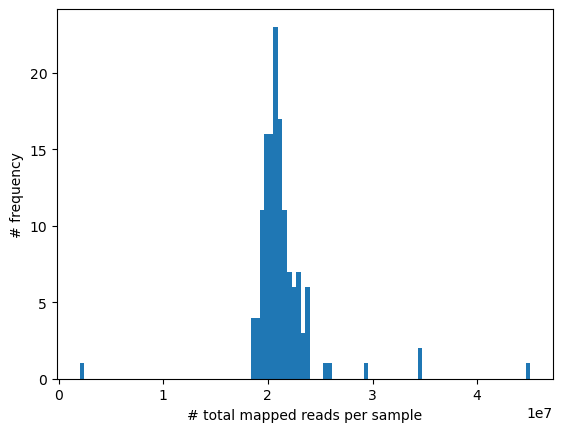

In [9]:
def mapped_read_distribution(df: pd.DataFrame):
    df_work = df.drop(labels = ['Chr', 'Start', 'End', 'Strand', 'Length', 'biotype'], axis = 1)
    mapped_reads = np.sum(df_work, axis = 0)
    plt.hist(mapped_reads, bins=100)
    plt.xlabel('# total mapped reads per sample')
    plt.ylabel('# frequency')

mapped_read_distribution(merged_df)

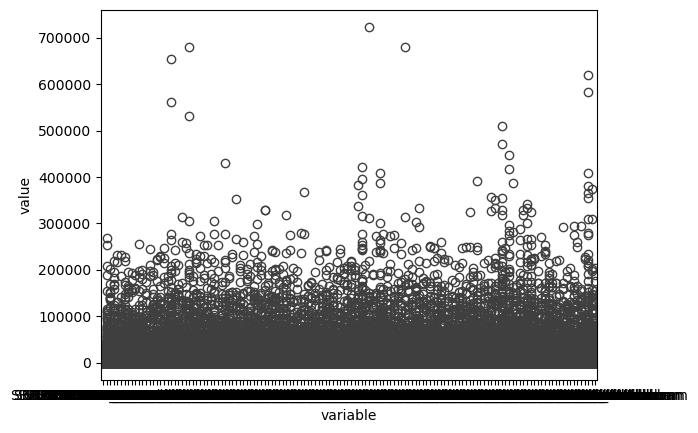

In [10]:
def per_sample_count_distribution(df: pd.DataFrame):
    df_work = df.drop(labels = ['Chr', 'Start', 'End', 'Strand', 'Length', 'biotype'], axis = 1)
    #df_work = df_work.transpose()
    df_work = pd.melt(df_work)

    sns.boxplot(data=df_work, x='variable', y='value')

per_sample_count_distribution(merged_df)

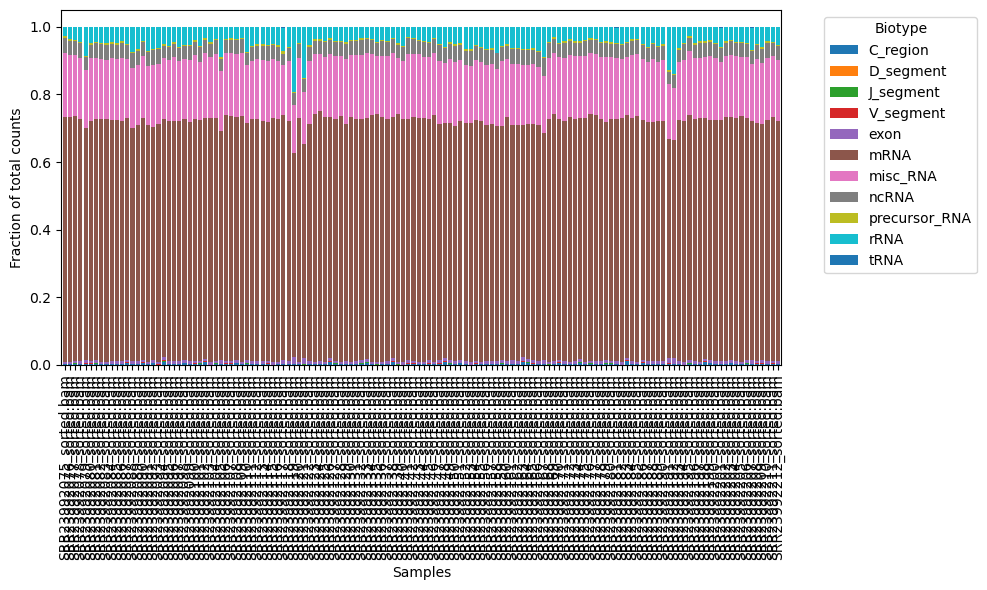

,SRR23992075_sorted.bam,SRR23992076_sorted.bam,SRR23992077_sorted.bam,SRR23992078_sorted.bam,SRR23992079_sorted.bam,SRR23992080_sorted.bam,SRR23992081_sorted.bam,SRR23992082_sorted.bam,SRR23992083_sorted.bam,SRR23992084_sorted.bam,...,SRR23992203_sorted.bam,SRR23992204_sorted.bam,SRR23992205_sorted.bam,SRR23992206_sorted.bam,SRR23992207_sorted.bam,SRR23992208_sorted.bam,SRR23992209_sorted.bam,SRR23992210_sorted.bam,SRR23992211_sorted.bam,SRR23992212_sorted.bam
biotype,,,,,,,,,,,,,,,,,,,,,
C_region,0.001684,0.001932,0.003444,0.001884,0.003152,0.002897,0.003736,0.001439,0.001057,0.001855,...,0.004243,0.002471,0.002200,0.003611,0.002391,0.003056,0.003218,0.001693,0.002938,0.001682
D_segment,0.000003,0.000009,0.000008,0.000007,0.000004,0.000009,0.000013,0.000003,0.000004,0.000007,...,0.000009,0.000008,0.000004,0.000017,0.000009,0.000009,0.000010,0.000005,0.000007,0.000004
J_segment,0.000280,0.000358,0.000595,0.000324,0.000423,0.000578,0.000645,0.000221,0.000182,0.000336,...,0.000649,0.000472,0.000372,0.000656,0.000441,0.000484,0.000590,0.000301,0.000469,0.000291
V_segment,0.000531,0.000626,0.001096,0.000574,0.000663,0.000973,0.001220,0.000425,0.000334,0.000610,...,0.001257,0.000673,0.000678,0.001100,0.000607,0.000926,0.000878,0.000434,0.000782,0.000475
exon,0.006204,0.006665,0.006075,0.007746,0.010033,0.007817,0.007322,0.006137,0.006831,0.007777,...,0.007722,0.006705,0.006054,0.009125,0.010901,0.008208,0.009335,0.008522,0.006617,0.007920
mRNA,0.725576,0.723221,0.724296,0.715767,0.688009,0.710536,0.713203,0.719410,0.718577,0.715355,...,0.719755,0.721369,0.725984,0.714591,0.707160,0.704158,0.699239,0.714864,0.723926,0.710377
misc_RNA,0.189095,0.184820,0.182099,0.181773,0.170789,0.183779,0.183307,0.177729,0.176457,0.181553,...,0.182826,0.181809,0.176982,0.181253,0.168239,0.189094,0.180384,0.182854,0.179077,0.180985
ncRNA,0.043771,0.042050,0.039452,0.043019,0.039259,0.040982,0.042491,0.043864,0.042880,0.041748,...,0.041765,0.039329,0.040286,0.039432,0.038497,0.039372,0.041259,0.045120,0.037631,0.041399
precursor_RNA,0.005033,0.004359,0.004317,0.004302,0.002814,0.003746,0.004002,0.003421,0.004796,0.004621,...,0.004170,0.003702,0.003997,0.003901,0.003771,0.003633,0.004148,0.003753,0.003224,0.004215


In [11]:
def plot_biotype_fractions(counts_df, figsize=(10,6), top_n=None):
    """
    Create a stacked barplot showing the fractional contribution of gene biotypes
    to total counts in each sample.

    Parameters
    ----------
    counts_df : pd.DataFrame
    Counts table with genes as rows, samples as columns, and an additional
    column for gene biotypes.
    figsize : tuple
    Size of the matplotlib figure.
    top_n : int or None
    If set, only the top_n most abundant biotypes are shown explicitly,
    others are grouped into "Other".
    """
    # Drop unneccessary columns
    counts_df = counts_df.drop(labels = ['Chr', 'Start', 'End', 'Strand', 'Length'], axis = 1)

    # Separate counts and biotype annotation
    sample_cols = counts_df.columns.difference(['biotype'])
    biotypes = counts_df['biotype']

    # Sum counts by biotype per sample
    summed = counts_df.groupby(biotypes)[sample_cols].sum()

    # Convert to fractional contribution per sample
    fractions = summed.div(summed.sum(axis=0), axis=1)

    # Optionally collapse rare biotypes
    if top_n is not None and top_n < fractions.shape[0]:
        totals = fractions.sum(axis=1).sort_values(ascending=False)
        keep = totals.index[:top_n]
        others = totals.index[top_n:]

        fractions.loc["Other"] = fractions.loc[others].sum()
        fractions = fractions.loc[keep.tolist() + ["Other"]]

    # Plot stacked barplot
    ax = fractions.T.plot(kind="bar", stacked=True, figsize=figsize, width=0.8)
    ax.set_ylabel("Fraction of total counts")
    ax.set_xlabel("Samples")
    ax.legend(title="Biotype", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

    return fractions

plot_biotype_fractions(merged_df)

--> Major gene biotypes are misc_RNA, ncRNA, mRNA

#### Data Cleaning

In [15]:
# Perform in silico rRNA,... depletion

def biotype_selection(df: pd.DataFrame, RNA_categories: list):
    
    df = df.drop(labels = ['Chr', 'Start', 'End', 'Strand'], axis = 1)
    
    df_work = df.loc[df['biotype'].isin(RNA_categories)]
    
    return df_work

#df_selected = biotype_selection(merged_df, ['mRNA', 'ncRNA', 'misc_RNA'])
df_selected = biotype_selection(merged_df, ['mRNA'])
df_selected

,Length,SRR23992090_sorted.bam,SRR23992103_sorted.bam,SRR23992114_sorted.bam,SRR23992093_sorted.bam,SRR23992144_sorted.bam,SRR23992210_sorted.bam,SRR23992157_sorted.bam,SRR23992148_sorted.bam,SRR23992092_sorted.bam,...,SRR23992085_sorted.bam,SRR23992086_sorted.bam,SRR23992203_sorted.bam,SRR23992204_sorted.bam,SRR23992194_sorted.bam,SRR23992178_sorted.bam,SRR23992119_sorted.bam,SRR23992196_sorted.bam,SRR23992206_sorted.bam,biotype
OR4F5,2618,0,0,0,3,0,1,0,0,0,...,0,0,0,0,1,2,0,1,0,mRNA
LOC112268260,1819,0,0,1,3,0,0,0,4,1,...,0,0,0,0,0,1,0,2,2,mRNA
OR4F29,939,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,mRNA
LOC105378947,2343,1,0,1,3,0,0,1,5,4,...,5,0,0,1,0,2,0,1,5,mRNA
OR4F16,13393,2,19,21,42,30,18,19,10,22,...,60,20,17,3,50,13,11,17,18,mRNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ND4L,297,584,3263,3913,4682,4062,4536,8685,12429,7592,...,3536,4358,5820,7917,2798,4013,4838,4749,9965,mRNA
ND4,1378,3090,17199,26753,24405,24361,26069,49239,69805,41087,...,20012,21650,37884,45559,18953,22551,32849,31171,55628,mRNA
ND5,1812,2214,7004,10201,10786,9501,12769,17865,27681,16846,...,9278,8659,16299,20120,5473,9803,13284,11908,23229,mRNA
ND6,525,1328,4094,7784,6058,6439,8258,11948,21127,10911,...,6691,5663,13950,15459,4860,7300,11507,8614,16504,mRNA


In [16]:
# Remove samples with low counts

def remove_low_expressed_samples(df):
    
    df_work = df.drop(labels=['Length', 'biotype'], axis=1)
    samples = df_work.loc[:,np.sum(df_work, axis=0) >1e7].columns.tolist() # 1 mio cut off for total number of reads

    all_cols = samples+['Length', 'biotype']

    return df[all_cols]

df_selected = remove_low_expressed_samples(df_selected)
df_selected

,SRR23992103_sorted.bam,SRR23992114_sorted.bam,SRR23992093_sorted.bam,SRR23992144_sorted.bam,SRR23992210_sorted.bam,SRR23992157_sorted.bam,SRR23992148_sorted.bam,SRR23992092_sorted.bam,SRR23992141_sorted.bam,SRR23992136_sorted.bam,...,SRR23992086_sorted.bam,SRR23992203_sorted.bam,SRR23992204_sorted.bam,SRR23992194_sorted.bam,SRR23992178_sorted.bam,SRR23992119_sorted.bam,SRR23992196_sorted.bam,SRR23992206_sorted.bam,Length,biotype
OR4F5,0,0,3,0,1,0,0,0,0,1,...,0,0,0,1,2,0,1,0,2618,mRNA
LOC112268260,0,1,3,0,0,0,4,1,0,0,...,0,0,0,0,1,0,2,2,1819,mRNA
OR4F29,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,939,mRNA
LOC105378947,0,1,3,0,0,1,5,4,1,2,...,0,0,1,0,2,0,1,5,2343,mRNA
OR4F16,19,21,42,30,18,19,10,22,34,78,...,20,17,3,50,13,11,17,18,13393,mRNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ND4L,3263,3913,4682,4062,4536,8685,12429,7592,3286,4185,...,4358,5820,7917,2798,4013,4838,4749,9965,297,mRNA
ND4,17199,26753,24405,24361,26069,49239,69805,41087,16787,22965,...,21650,37884,45559,18953,22551,32849,31171,55628,1378,mRNA
ND5,7004,10201,10786,9501,12769,17865,27681,16846,7183,10628,...,8659,16299,20120,5473,9803,13284,11908,23229,1812,mRNA
ND6,4094,7784,6058,6439,8258,11948,21127,10911,5200,6480,...,5663,13950,15459,4860,7300,11507,8614,16504,525,mRNA


In [17]:
# Remove genes with low average expression

def remove_low_expressed_genes(df, threshold):
    
    df_work = df.drop(labels=['Length', 'biotype'], axis=1)
    genes = df_work.loc[np.mean(df_work, axis=1) > threshold].index.tolist() # mean > 3 --> expression above 10 in at least 42 samples

    return df.loc[genes]

df_selected = remove_low_expressed_genes(df_selected, 1)
df_selected

,SRR23992103_sorted.bam,SRR23992114_sorted.bam,SRR23992093_sorted.bam,SRR23992144_sorted.bam,SRR23992210_sorted.bam,SRR23992157_sorted.bam,SRR23992148_sorted.bam,SRR23992092_sorted.bam,SRR23992141_sorted.bam,SRR23992136_sorted.bam,...,SRR23992086_sorted.bam,SRR23992203_sorted.bam,SRR23992204_sorted.bam,SRR23992194_sorted.bam,SRR23992178_sorted.bam,SRR23992119_sorted.bam,SRR23992196_sorted.bam,SRR23992206_sorted.bam,Length,biotype
LOC112268260,0,1,3,0,0,0,4,1,0,0,...,0,0,0,0,1,0,2,2,1819,mRNA
LOC105378947,0,1,3,0,0,1,5,4,1,2,...,0,0,1,0,2,0,1,5,2343,mRNA
OR4F16,19,21,42,30,18,19,10,22,34,78,...,20,17,3,50,13,11,17,18,13393,mRNA
SAMD11,63,196,103,166,202,158,316,157,188,100,...,166,348,322,244,154,185,184,278,3586,mRNA
NOC2L,320,924,522,748,919,835,1456,883,928,440,...,932,1521,1460,798,823,925,1057,1315,2757,mRNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ND4L,3263,3913,4682,4062,4536,8685,12429,7592,3286,4185,...,4358,5820,7917,2798,4013,4838,4749,9965,297,mRNA
ND4,17199,26753,24405,24361,26069,49239,69805,41087,16787,22965,...,21650,37884,45559,18953,22551,32849,31171,55628,1378,mRNA
ND5,7004,10201,10786,9501,12769,17865,27681,16846,7183,10628,...,8659,16299,20120,5473,9803,13284,11908,23229,1812,mRNA
ND6,4094,7784,6058,6439,8258,11948,21127,10911,5200,6480,...,5663,13950,15459,4860,7300,11507,8614,16504,525,mRNA


In [18]:
# Check biotype distribution

df_selected['biotype'].value_counts()

biotype
mRNA    12076
Name: count, dtype: int64

In [19]:
# TPM normalization

def TPM(df, pse):
    """
    df: rRNA depleted input table
    meta: original dataframe including 'Length' column
    pse: pseudocount
    """
    
    lengths = df['Length']
    tpmData = df.drop(labels=['Length', 'biotype'], axis=1)

    for i in range(0,tpmData.shape[1]):
        rpk = (tpmData.iloc[:,i]+pse)/lengths
        scalingfactor = np.sum(rpk)/1000000
        tpm = rpk/scalingfactor

        tpmData.iloc[:,i] = tpm
    
    return tpmData

tpm_data = TPM(df_selected, 0.5)
tpm_data

/tmp/ipykernel_16322/2128165422.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'LOC112268260       0.048363
LOC105378947       0.037547
OR4F16             0.256174
SAMD11             3.115602
NOC2L             20.453601
                   ...     
ND4L            1933.328598
ND4             2196.064602
ND5              680.138648
ND6             1372.208419
CYTB            1434.627743
Length: 12076, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  tpmData.iloc[:,i] = tpm
/tmp/ipykernel_16322/2128165422.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'LOC112268260       0.130386
LOC105378947       0.101226
OR4F16             0.253825
SAMD11             8.664145
NOC2L             53.020471
                   ...     
ND4L            2083.446327
ND4             3069.762784
ND5       

,SRR23992103_sorted.bam,SRR23992114_sorted.bam,SRR23992093_sorted.bam,SRR23992144_sorted.bam,SRR23992210_sorted.bam,SRR23992157_sorted.bam,SRR23992148_sorted.bam,SRR23992092_sorted.bam,SRR23992141_sorted.bam,SRR23992136_sorted.bam,...,SRR23992168_sorted.bam,SRR23992085_sorted.bam,SRR23992086_sorted.bam,SRR23992203_sorted.bam,SRR23992204_sorted.bam,SRR23992194_sorted.bam,SRR23992178_sorted.bam,SRR23992119_sorted.bam,SRR23992196_sorted.bam,SRR23992206_sorted.bam
LOC112268260,0.048363,0.130386,0.373025,0.052043,0.048954,0.048191,0.402189,0.173888,0.051308,0.048687,...,0.211648,0.051436,0.047295,0.035583,0.043065,0.040992,0.145570,0.042397,0.196293,0.188333
LOC105378947,0.037547,0.101226,0.289600,0.040404,0.038006,0.112241,0.381629,0.404997,0.119499,0.188990,...,0.295765,0.439258,0.036718,0.027625,0.100301,0.031824,0.188356,0.032915,0.091436,0.321669
OR4F16,0.256174,0.253825,0.615196,0.431173,0.246008,0.255263,0.127456,0.354255,0.480823,1.038159,...,0.546163,0.845293,0.263362,0.169146,0.040943,0.562310,0.177938,0.132440,0.186620,0.189283
SAMD11,3.115602,8.664145,5.595417,8.790894,10.057028,7.749071,14.348747,9.261500,9.811717,4.963955,...,8.008941,8.688274,7.988782,12.580376,14.089790,10.167899,7.605552,7.978692,7.348239,10.642242
NOC2L,20.453601,53.020471,36.741078,51.402488,59.397734,53.130065,85.886376,67.574192,62.862128,28.299660,...,46.388405,53.653080,58.195404,71.439156,82.994608,43.191751,52.727769,51.777100,54.782370,65.384122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ND4L,1933.328598,2083.446327,3056.495130,2589.798800,2720.316132,5127.067480,6803.740901,5390.628794,2065.480609,2496.105654,...,2356.330627,2228.162014,2524.975785,2536.909475,4176.540605,1405.178571,2385.499748,2512.767805,2283.960818,4597.914092
ND4,2196.064602,3069.762784,3433.530135,3347.217308,3369.290017,6264.624936,8235.519157,6287.407011,2273.949119,2951.880382,...,2697.314867,2717.575886,2703.306754,3558.881016,5179.821775,2051.175678,2888.941672,3676.864360,3230.767388,5531.798349
ND5,680.138648,890.182943,1154.050267,992.802998,1255.077691,1728.572662,2483.601902,1960.480687,739.983162,1038.928956,...,981.208094,958.184479,822.263930,1164.440267,1739.665139,450.473850,955.070689,1130.798133,938.633552,1756.709205
ND6,1372.208419,2344.470906,2237.217358,2322.319371,2801.539697,3990.108843,6542.434210,4382.644348,1848.969436,2186.358013,...,2087.145324,2385.029372,1856.103621,3439.787360,4613.401214,1380.652235,2454.742031,3380.802050,2343.516300,4307.856986


In [20]:
# Edit column names to only SRR number

sample_names = [a.split('_')[0] for a in tpm_data.columns.tolist()]
tpm_data.columns = sample_names
tpm_data.head()

,SRR23992103,SRR23992114,SRR23992093,SRR23992144,SRR23992210,SRR23992157,SRR23992148,SRR23992092,SRR23992141,SRR23992136,...,SRR23992168,SRR23992085,SRR23992086,SRR23992203,SRR23992204,SRR23992194,SRR23992178,SRR23992119,SRR23992196,SRR23992206
LOC112268260,0.048363,0.130386,0.373025,0.052043,0.048954,0.048191,0.402189,0.173888,0.051308,0.048687,...,0.211648,0.051436,0.047295,0.035583,0.043065,0.040992,0.145570,0.042397,0.196293,0.188333
LOC105378947,0.037547,0.101226,0.289600,0.040404,0.038006,0.112241,0.381629,0.404997,0.119499,0.188990,...,0.295765,0.439258,0.036718,0.027625,0.100301,0.031824,0.188356,0.032915,0.091436,0.321669
OR4F16,0.256174,0.253825,0.615196,0.431173,0.246008,0.255263,0.127456,0.354255,0.480823,1.038159,...,0.546163,0.845293,0.263362,0.169146,0.040943,0.562310,0.177938,0.132440,0.186620,0.189283
SAMD11,3.115602,8.664145,5.595417,8.790894,10.057028,7.749071,14.348747,9.261500,9.811717,4.963955,...,8.008941,8.688274,7.988782,12.580376,14.089790,10.167899,7.605552,7.978692,7.348239,10.642242
NOC2L,20.453601,53.020471,36.741078,51.402488,59.397734,53.130065,85.886376,67.574192,62.862128,28.299660,...,46.388405,53.653080,58.195404,71.439156,82.994608,43.191751,52.727769,51.777100,54.782370,65.384122


In [21]:
# Export tpm data

final_tpm = tpm_data.transpose()
final_tpm.to_csv('OConnell_TPM_data.csv')

In [22]:
final_log = np.log2(final_tpm+1)
final_log.to_csv('OConnell_log_data.csv')

## Load metadata

In [ ]:
meta = pd.read_csv('../data/bulk_data/OConnell_2024/SraRunTable.csv')
meta.head()

,260:230_ratio,260:280_ratio,Run,AGE,Assay Type,AvgSpotLen,Bases,BIOMATERIAL_PROVIDER,BioProject,BioSample,...,ReleaseDate,rna_integrity_number,create_date,version,Sample Name,sample_type,sex,Smoking,SRA Study,tissue
0,1.67,2.03,SRR23992075,70,RNA-Seq,300,6613105500,"Grant OConnell\, PI\, Molecular Biomarker Core...",PRJNA949611,SAMN33948025,...,2023-09-11T00:00:00Z,9.3,2023-03-28T14:43:00Z,1,HS_WB_0064,liquid biopsy,male,no,SRP429744,blood
1,2.04,2.08,SRR23992076,49,RNA-Seq,300,6566094000,"Grant OConnell\, PI\, Molecular Biomarker Core...",PRJNA949611,SAMN33948024,...,2023-09-11T00:00:00Z,8.1,2023-03-28T14:42:00Z,1,HS_WB_0063,liquid biopsy,male,yes,SRP429744,blood
2,2.08,2.08,SRR23992077,62,RNA-Seq,300,6749843100,"Grant OConnell\, PI\, Molecular Biomarker Core...",PRJNA949611,SAMN33948023,...,2023-09-11T00:00:00Z,6.6,2023-03-28T14:44:00Z,1,HS_WB_0062,liquid biopsy,male,no,SRP429744,blood
3,1.87,2.05,SRR23992078,66,RNA-Seq,300,7136929200,"Grant OConnell\, PI\, Molecular Biomarker Core...",PRJNA949611,SAMN33948022,...,2023-09-11T00:00:00Z,7.9,2023-03-28T14:47:00Z,1,HS_WB_0061,liquid biopsy,female,no,SRP429744,blood
4,2.01,2.10,SRR23992079,31,RNA-Seq,300,6171494100,"Grant OConnell\, PI\, Molecular Biomarker Core...",PRJNA949611,SAMN33947968,...,2023-09-11T00:00:00Z,8.7,2023-03-28T14:40:00Z,1,HS_WB_0007,liquid biopsy,female,no,SRP429744,blood


Relevant columns: Run, body_mass_index, disease, eosinophil_count, lymphocyte_count, monocyte_count, neutrophil_count, sex, smoking

In [24]:
meta = meta[['Run', 'body_mass_index', 'disease', 'eosinophil_count', 'lymphocyte_count', 'monocyte_count', 'neutrophil_count', 'sex', 'Smoking', 'Sample Name']]
meta.head()

,Run,body_mass_index,disease,eosinophil_count,lymphocyte_count,monocyte_count,neutrophil_count,sex,Smoking,Sample Name
0,SRR23992075,31.3,obesity,0.008,0.119,0.071,0.801,male,no,HS_WB_0064
1,SRR23992076,28.0,hypothyroidism,0.023,0.261,0.068,0.636,male,yes,HS_WB_0063
2,SRR23992077,25.2,dyslipidemia,0.038,0.269,0.096,0.596,male,no,HS_WB_0062
3,SRR23992078,24.0,"hypertension\, hypothyroidism",0.015,0.291,0.075,0.618,female,no,HS_WB_0061
4,SRR23992079,24.8,asthma,0.002,0.135,0.058,0.798,female,no,HS_WB_0007


In [35]:
# Get cell type proportions

props = meta[['Run', 'eosinophil_count', 'lymphocyte_count', 'monocyte_count', 'neutrophil_count']]
props.set_index('Run', inplace=True)
props.columns = ['Eosinophils', 'Lymphocytes', 'Monocytes', 'Neutrophils']
props = props.loc[sample_names] # set to filtered samples from tpm_data
props

,Eosinophils,Lymphocytes,Monocytes,Neutrophils
Run,,,,
SRR23992103,0.005,0.059,0.030,0.905
SRR23992114,0.007,0.322,0.085,0.576
SRR23992093,0.045,0.273,0.061,0.620
SRR23992144,0.020,0.099,0.139,0.733
SRR23992210,0.009,0.207,0.052,0.731
...,...,...,...,...
SRR23992194,0.015,0.104,0.060,0.806
SRR23992178,0.003,0.271,0.070,0.655
SRR23992119,0.031,0.234,0.094,0.640


In [36]:
# Save props

props.to_csv('OConnell_proportions.csv')

In [38]:
# Get props in different formats

props_no_eosinophils = props.drop(['Eosinophils'], axis = 1)
props_no_eosinophils.to_csv('OConnell_proportions_no_eosinophils.csv')

These proportions were used in the GrooD paper.

## Visualizing processed data

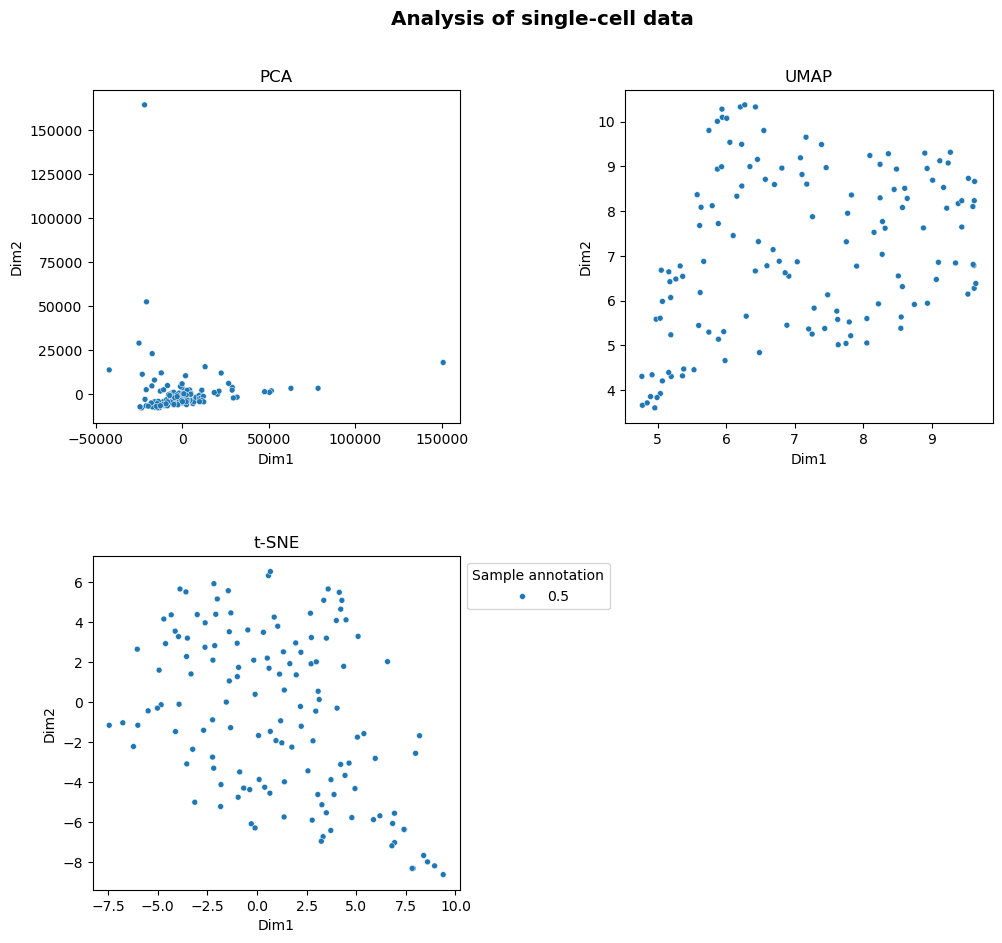

In [39]:
# PCA, t-SNE, UMAP
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

def cluster_bulks(df):

    df = df.transpose()

    fig, axs = plt.subplots(2,2, figsize=(10,10))
    axs[1,1].axis('off')
    # plt.subplots_adjust(hspace=0.15)
    plt.suptitle('Analysis of single-cell data', fontweight = 'bold', fontsize = 'x-large')
    plt.subplots_adjust(left=0.05, bottom=0.1, right=0.95, top=0.9, wspace=0.45,hspace=0.4)

    pca = PCA(n_components = 2)
    components = pca.fit_transform(df)
    
    X = pd.DataFrame(components)
    X.columns = ["Dim1", "Dim2"]
    sns.scatterplot(ax = axs[0,0], x = "Dim1", y = "Dim2", data = X, legend = False, size = 0.5)
    #sns.move_legend(axs[0,0], "upper left", bbox_to_anchor=(1, 1))
    axs[0,0].set_title('PCA')

    fit = umap.UMAP()
    u = fit.fit_transform(df)

    X = pd.DataFrame(u)
    X.columns = ["Dim1", "Dim2"]
    sns.scatterplot(ax = axs[0,1], x = "Dim1", y = "Dim2", data = X, legend = False, size = 0.5)
    #sns.move_legend(axs[0,1], "upper left", bbox_to_anchor=(1, 1))
    axs[0,1].set_title('UMAP')

    u = TSNE(n_components = 2, learning_rate = 'auto', init = 'random', perplexity = 30).fit_transform(df)
    X = pd.DataFrame(u)
    X.columns = ["Dim1", "Dim2"]
    sns.scatterplot(ax = axs[1,0], x = "Dim1", y = "Dim2", data = X, size = 0.5)
    sns.move_legend(axs[1,0], "upper left", bbox_to_anchor=(1, 1), ncol = 4, title = 'Sample annotation')
    axs[1,0].set_title('t-SNE')

cluster_bulks(tpm_data)

In [40]:
# Visualization by cell type proportion

def clusterTypes(df, metadata, feature):

    df = df.transpose()
    
    metaData_final = metadata

    fig, axs = plt.subplots(2,2, figsize=(10,10))
    axs[1,1].axis('off')
    # plt.subplots_adjust(hspace=0.15)
    plt.suptitle(f"Analysis of bulk data, colored by {feature}", fontweight = 'bold', fontsize = 'x-large')
    plt.subplots_adjust(left=0.05, bottom=0.1, right=0.95, top=0.9, wspace=0.45,hspace=0.4)

    pca = PCA(n_components = 2)
    components = pca.fit_transform(df)
    
    labels = metaData_final[feature]
    X = pd.DataFrame(pd.concat([pd.DataFrame(components, index=metaData_final.index.to_list()), pd.DataFrame(labels, index=metaData_final.index.to_list())], axis = 1, ignore_index=False))
    X.columns = ["Dim1", "Dim2", str(feature)]
    sns.scatterplot(ax = axs[0,0], x = "Dim1", y = "Dim2", data = X, hue = str(feature), legend = False, size = 0.5)
    #sns.move_legend(axs[0,0], "upper left", bbox_to_anchor=(1, 1))
    axs[0,0].set_title('PCA')

    fit = umap.UMAP()
    u = fit.fit_transform(df)

    labels = metaData_final[feature]
    X = pd.DataFrame(pd.concat([pd.DataFrame(u, index=metaData_final.index.to_list()), pd.DataFrame(labels, index=metaData_final.index.to_list())], axis = 1, ignore_index=False))
    X.columns = ["Dim1", "Dim2", str(feature)]
    sns.scatterplot(ax = axs[0,1], x = "Dim1", y = "Dim2", data = X, hue = str(feature), legend = False, size = 0.5)
    #sns.move_legend(axs[0,1], "upper left", bbox_to_anchor=(1, 1))
    axs[0,1].set_title('UMAP')

    u = TSNE(n_components = 2, learning_rate = 'auto', init = 'random', perplexity = 30).fit_transform(df)
    labels = metaData_final[feature]
    X = pd.DataFrame(pd.concat([pd.DataFrame(u, index=metaData_final.index.to_list()), pd.DataFrame(labels, index=metaData_final.index.to_list())], axis = 1, ignore_index=False))
    X.columns = ["Dim1", "Dim2", str(feature)]
    sns.scatterplot(ax = axs[1,0], x = "Dim1", y = "Dim2", data = X, hue = str(feature), size = 0.5)
    sns.move_legend(axs[1,0], "upper left", bbox_to_anchor=(1, 1), ncol = 4, title = 'Sample annotation')
    axs[1,0].set_title('t-SNE')

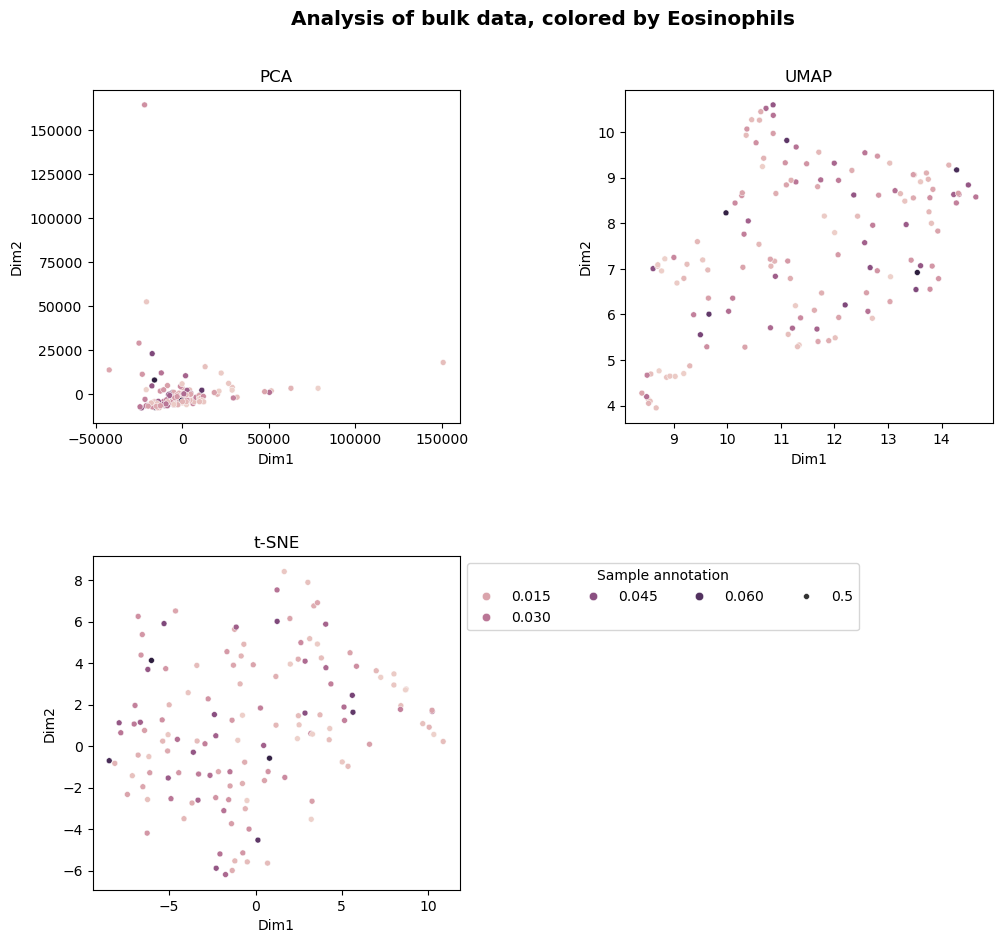

In [41]:
clusterTypes(tpm_data, props, 'Eosinophils')

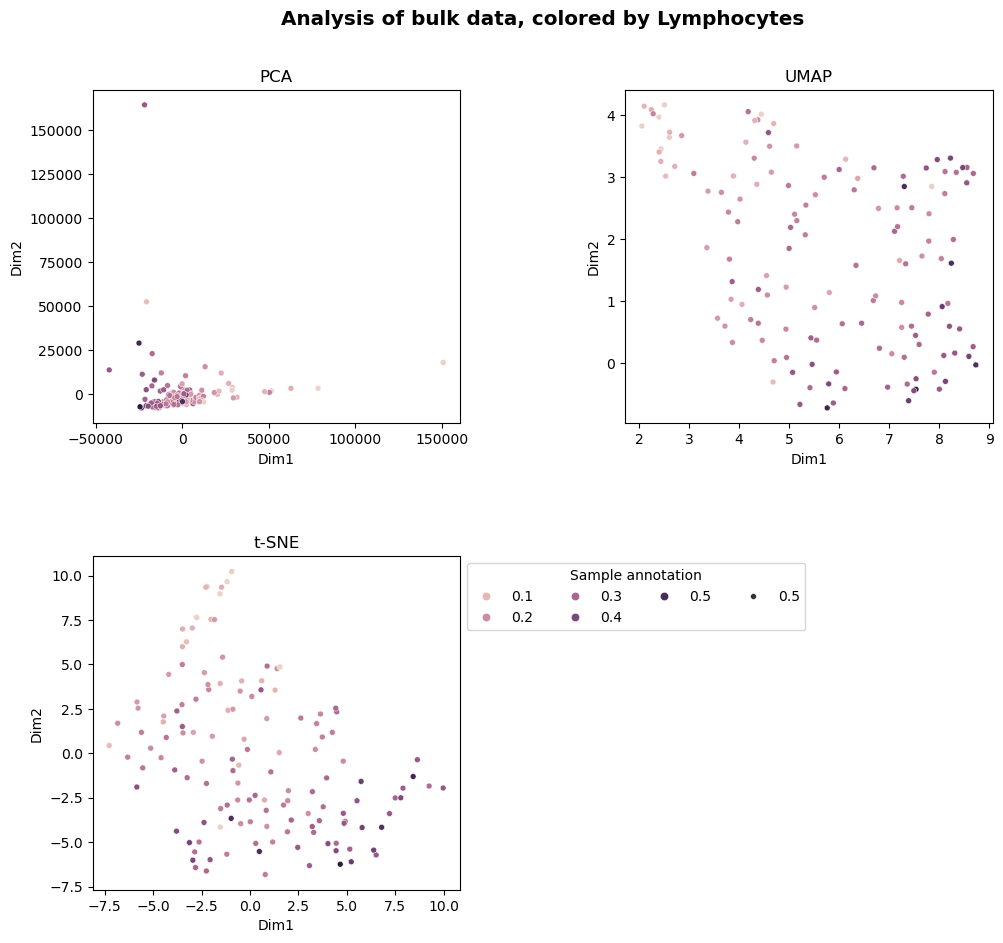

In [42]:
clusterTypes(tpm_data, props, 'Lymphocytes')

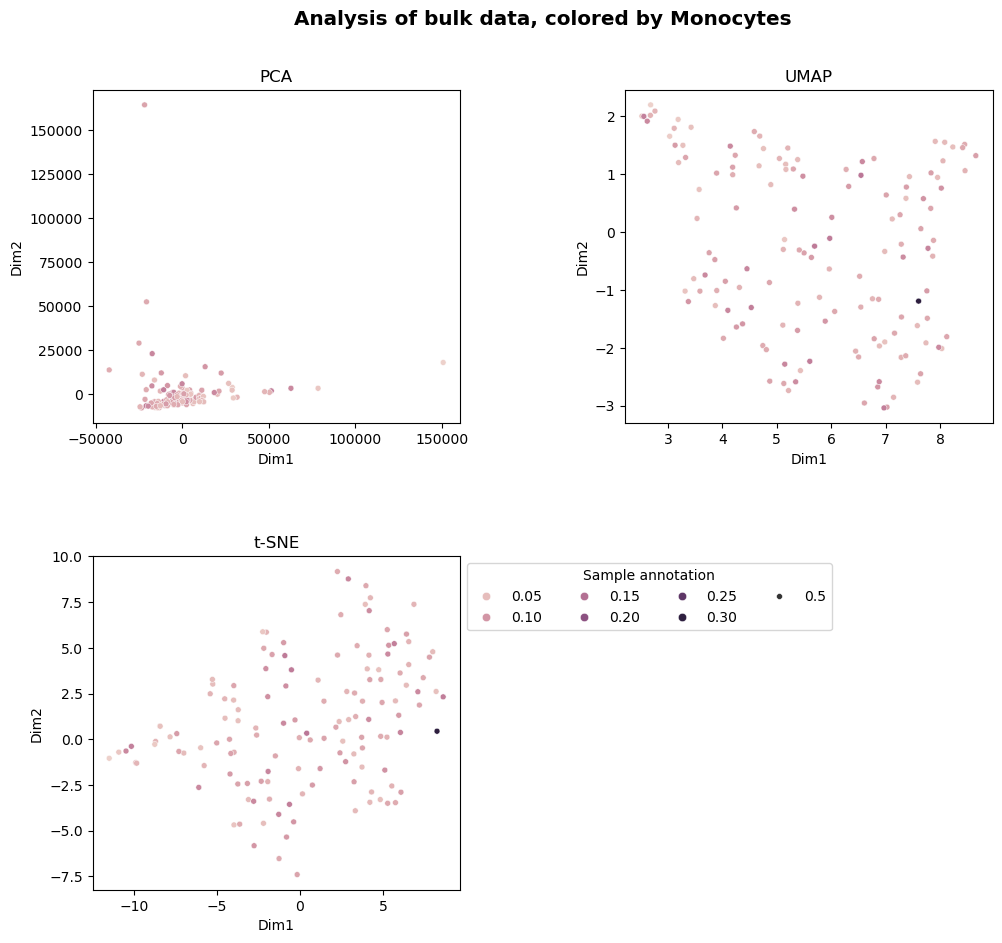

In [43]:
clusterTypes(tpm_data, props, 'Monocytes')

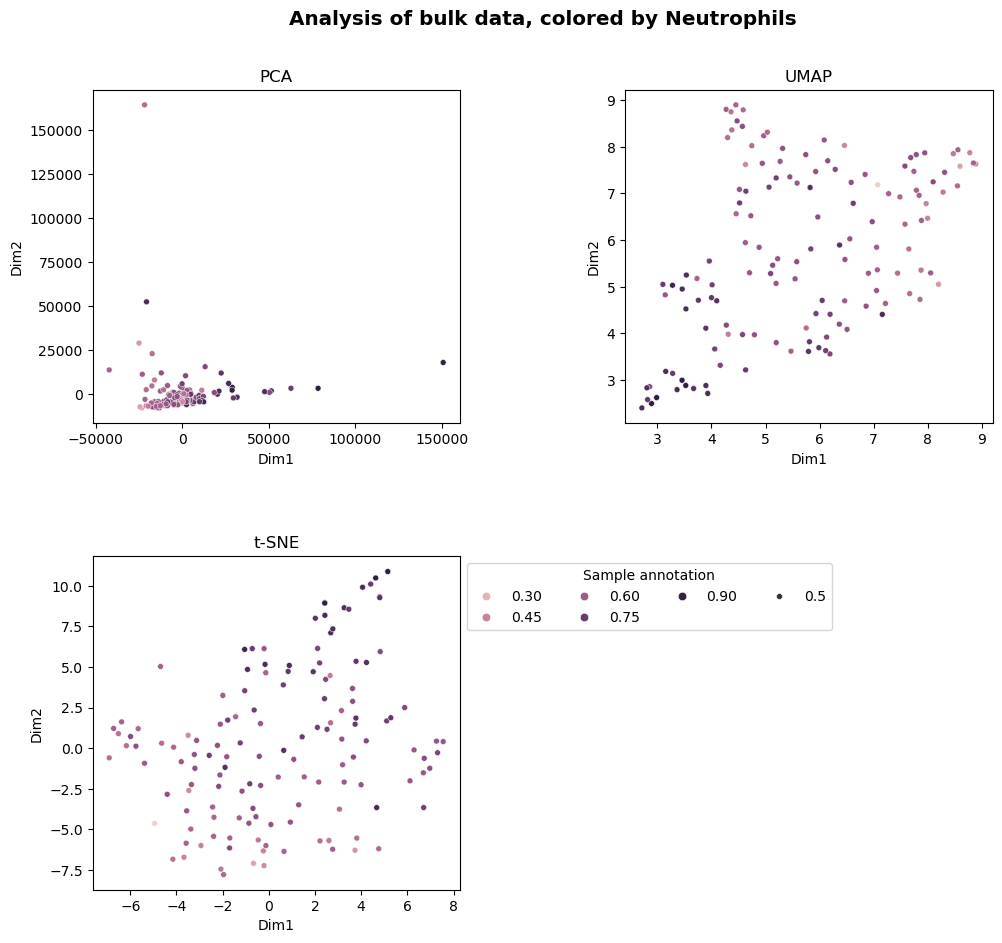

In [44]:
clusterTypes(tpm_data, props, 'Neutrophils')

In [45]:
# Heatmap/Clustermap of selected genes

def get_clustermap(data, prop, cell_type):

    # Format data
    data_selected = data # subset bulk data
    #data_selected = pd.DataFrame(index=data_selected.index.tolist(), columns=data_selected.columns.tolist(), data=stats.zscore(np.array(data_selected), axis = 1))
    prop_series = pd.Series(prop[cell_type]) # series for proportion for cell type investigated here

    # Create clustermap
    g = sns.clustermap(
        data_selected,
        col_cluster=True,
        row_cluster=True,
        cmap="viridis",
        figsize=(8, 6),
        dendrogram_ratio=0.35,
        z_score=0
    )

    # Reorder the sample values to match clustered column order
    col_order = [data_selected.columns[i] for i in g.dendrogram_col.reordered_ind]
    prop_series_reordered = prop_series[col_order]

    # Add a new axis on top for the bar plot
    # Position: [left, bottom, width, height] in figure coordinates
    bar_height = 0.5  # relative height of bar plot
    heatmap_pos = g.ax_heatmap.get_position()

    bar_ax = g.fig.add_axes([
        heatmap_pos.x0,                      # left
        heatmap_pos.y1 + 0.02,               # bottom just above heatmap
        heatmap_pos.width,                   # same width as heatmap
        bar_height / g.fig.get_size_inches()[1]  # normalized height
    ])

    # ---- 5. Plot bars ----
    bar_ax.bar(
        x=np.arange(len(prop_series_reordered)),
        height=prop_series_reordered,
        color="gray"
    )

    # Remove x ticks
    bar_ax.set_xticks([])
    bar_ax.set_xlim(-0.5, len(prop_series_reordered) - 0.5)
    bar_ax.set_ylabel(f"Proportion {cell_type}")

    # Optional: make y-axis more compact
    bar_ax.spines["top"].set_visible(False)
    bar_ax.spines["right"].set_visible(False)

    #plt.title(f"Prediction and Expression of most important features for {cell_type}", )

    return g
    

/ceph/ibmi/it/projects/ML_BI/Mamba/envs/Jupyter_new/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/ceph/ibmi/it/projects/ML_BI/Mamba/envs/Jupyter_new/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/ceph/ibmi/it/projects/ML_BI/Mamba/envs/Jupyter_new/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/ceph/ibmi/it/projects/ML_BI/Mamba/envs/Jupyter_new/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/ceph/ibmi/it/projects/ML_BI/Mamba/envs/Jupyter_new/lib/python3.11/site-packages/seaborn

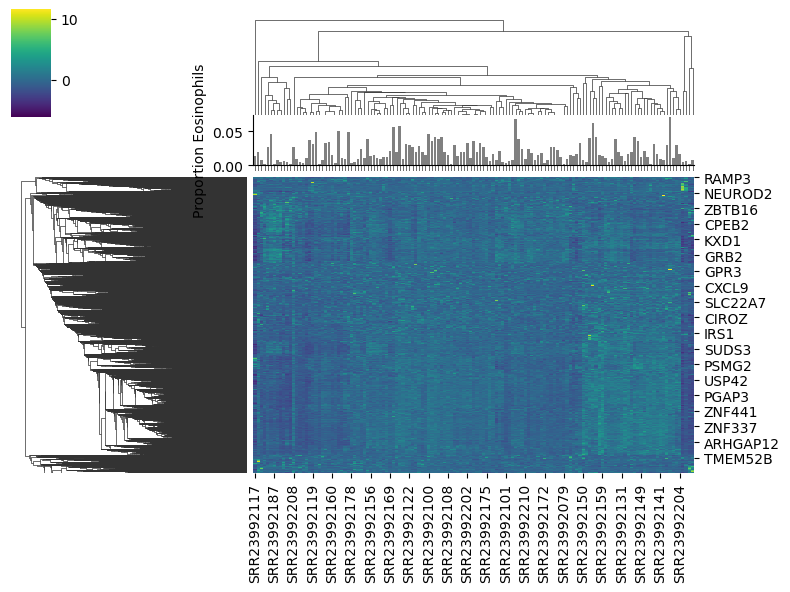

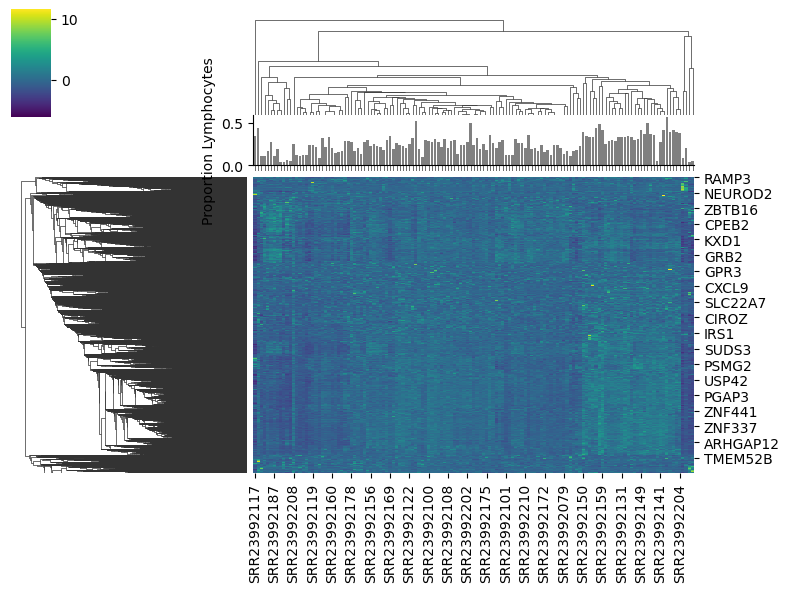

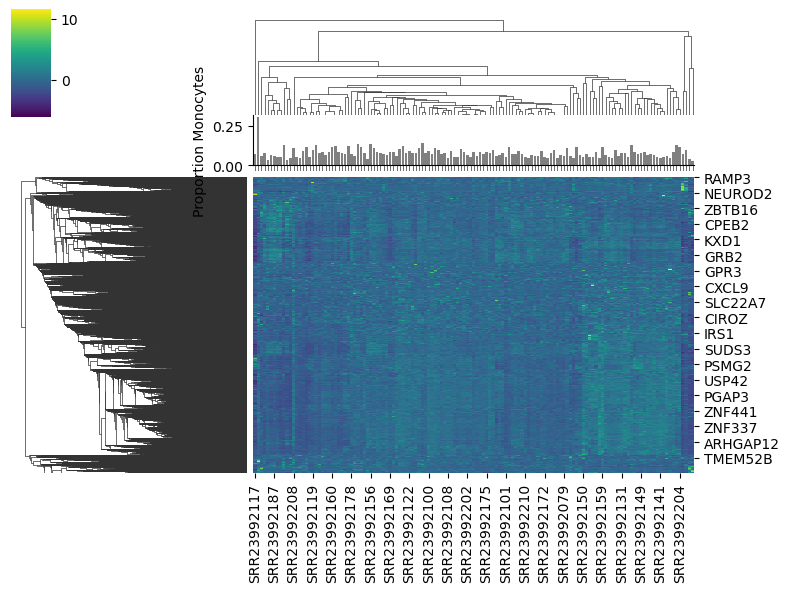

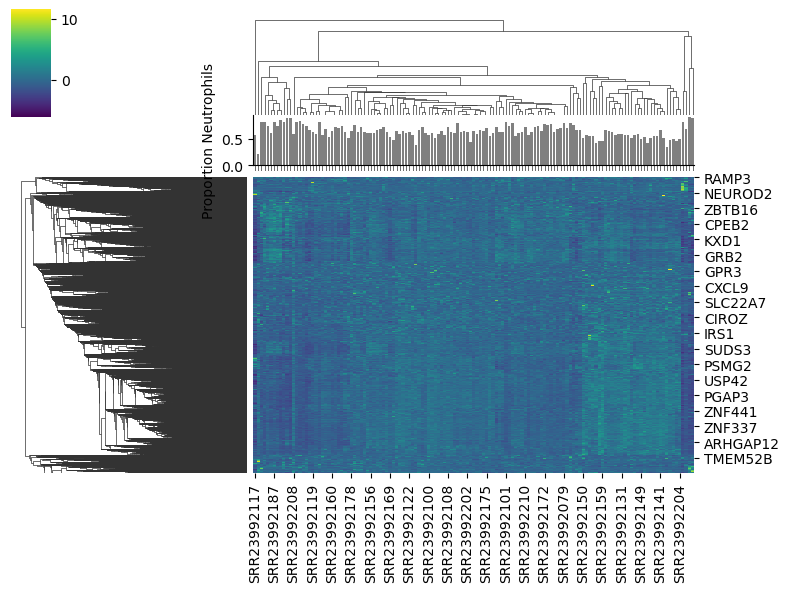

In [46]:
for cellType in props.columns.tolist():
    get_clustermap(tpm_data, props, cellType)